In this notebook we are going to look through the data we are given from the other groups! (Shoutout to Davon and company)
This script isn't going to be concerned with how data is collected from marta but simply reads a JSON of one ping.

I have provided two files:

In [289]:
import os
from datetime import datetime
from dateutil import parser
import datetime
import pandas as pd
import math
import numpy as np
from sklearn import preprocessing

cwd = os.getcwd()
print(os.listdir(cwd))

['.git', '.ipynb_checkpoints', 'busExample.json', 'busList.json', 'Feature Selection and Creation.ipynb', 'marta.json', 'README.md', 'Untitled.ipynb']


Here we are going to visualize the two files that we have to better understand what data we are recieving and how to utilize this information

In [71]:
import json
from pprint import pprint

with open('marta.json') as f:
    busExample = json.load(f)

For ease of visualization I am going to just print one bus' data for one time

In [74]:
instance = busExample[0]
pprint(instance)

{'ADHERENCE': '0',
 'BLOCKID': '224',
 'BLOCK_ABBR': '196-2',
 'DIRECTION': 'Northbound',
 'LATITUDE': '33.6500981',
 'LONGITUDE': '-84.4482871',
 'MSGTIME': '3/9/2019 11:58:19 AM',
 'ROUTE': '196',
 'STOPID': '166900',
 'TIMEPOINT': 'College Pk Station (South Loop)',
 'TRIPID': '6604719',
 'VEHICLE': '1714'}


In [75]:
# just game out an idea in this block of what you would like for your vector you can implement this later if you wish!

features = []

Finally we are going to parse through the bigger file and store information about different buses:
Here we are going to find the dict of (vehicle, jsonList)

In [81]:
with open('marta.json') as f:
    busExample = json.load(f)

busDict = dict()

for entry in busExample:
    vehicle = entry['VEHICLE']
    if vehicle in busDict:
        temp = busDict[vehicle]
        temp.append(entry)
        busDict[vehicle] = temp
    else:
        busDict[vehicle] = [entry]

Here we are going to find the dict of (route, jsonList)

In [83]:
routeDict = dict()

for entry in busExample:
    route= entry['ROUTE']
    if route in routeDict:
        temp = routeDict[route]
        temp.append(entry)
        routeDict[route] = temp
    else:
        temp = []
        temp.append(entry)
        routeDict[route] = temp

In [84]:
dt = parser.parse(instance['MSGTIME'])
print(dt.date())
print(dt.time())

2019-03-09
11:58:19


In [145]:
import json

def build_data_struct(json_input):
    
    with open(json_input) as f:
        dictList = json.load(f)
        
    dayDict = dict()
    
    for entry in dictList:
        vehicle = entry['VEHICLE']
        dt = parser.parse(entry['MSGTIME'])
        date = dt.date()
        if date in dayDict:
            if vehicle in dayDict[date]:
                temp = dayDict[date][vehicle]
                temp.append(entry)
                dayDict[date][vehicle] = temp
            else:
                dayDict[date][vehicle] = [entry]
        else:
            temp = dict()
            temp[vehicle] = [entry]
            dayDict[date] = temp
            
    for date in dayDict.keys():
        vehicleDict = dayDict[date]
        for veh in vehicleDict.keys():
            vehicle = vehicleDict[veh]
            times = set()
            ls = []
            for ping in vehicle:
                if ping['MSGTIME'] not in times:
                    times.add(ping['MSGTIME'])
                    ls.append(ping)
            newlist = sorted(ls, key=lambda k: toTime(k['MSGTIME']))
            dayDict[date][veh] = newlist
    return dayDict

def toTime(name):
    dt = parser.parse(name)
    return dt.time()

In [86]:
dayDict = build_data_struct('marta.json')
pprint(dayDict)

{datetime.date(2019, 3, 9): {'1401': [{'ADHERENCE': '-6',
                                       'BLOCKID': '183',
                                       'BLOCK_ABBR': '186-3',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.709761',
                                       'LONGITUDE': '-84.2705976',
                                       'MSGTIME': '3/9/2019 1:33:24 PM',
                                       'ROUTE': '186',
                                       'STOPID': '130122',
                                       'TIMEPOINT': 'Rainbow Dr & Candler Rd',
                                       'TRIPID': '6569889',
                                       'VEHICLE': '1401'},
                                      {'ADHERENCE': '-3',
                                       'BLOCKID': '183',
                                       'BLOCK_ABBR': '186-3',
                                       'DIRECTION': 'Eastbound',


                                       'ROUTE': '86',
                                       'STOPID': '107262',
                                       'TIMEPOINT': 'Columbia Dr & Snapfinger '
                                                    'Rd',
                                       'TRIPID': '6569460',
                                       'VEHICLE': '1404'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '538',
                                       'BLOCK_ABBR': '86-2',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7722673',
                                       'LONGITUDE': '-84.2527728',
                                       'MSGTIME': '3/9/2019 3:38:47 PM',
                                       'ROUTE': '86',
                                       'STOPID': '900686',
                                       'TIMEPOINT': 'Kensington Station'

                                       'BLOCKID': '83',
                                       'BLOCK_ABBR': '120-3',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7933458',
                                       'LONGITUDE': '-84.2641667',
                                       'MSGTIME': '3/9/2019 2:05:42 PM',
                                       'ROUTE': '120',
                                       'STOPID': '904010',
                                       'TIMEPOINT': 'Ponce de Leon Ave & '
                                                    'Decatur Rd',
                                       'TRIPID': '6609199',
                                       'VEHICLE': '1417'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '83',
                                       'BLOCK_ABBR': '120-3',
                                       'DIRECTION': 'Westbound'

                                       'TRIPID': '6594794',
                                       'VEHICLE': '1428'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '541',
                                       'BLOCK_ABBR': '86-5',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.6986926',
                                       'LONGITUDE': '-84.0992224',
                                       'MSGTIME': '3/9/2019 1:11:53 PM',
                                       'ROUTE': '86',
                                       'STOPID': '134088',
                                       'TIMEPOINT': 'Mall at Stonecrest',
                                       'TRIPID': '6607555',
                                       'VEHICLE': '1428'},
                                      {'ADHERENCE': '-8',
                                       'BLOCKID': '541',
               

                                       'LONGITUDE': '-84.2187838',
                                       'MSGTIME': '3/9/2019 3:01:53 PM',
                                       'ROUTE': '124',
                                       'STOPID': '211570',
                                       'TIMEPOINT': 'Lawerenceville Hwy & H '
                                                    'Howell Rd',
                                       'TRIPID': '6582148',
                                       'VEHICLE': '1439'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '103',
                                       'BLOCK_ABBR': '124-3',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.9027682',
                                       'LONGITUDE': '-84.2446729',
                                       'MSGTIME': '3/9/2019 3:14:24 PM',
                                     

                                       'ROUTE': '51',
                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6621140',
                                       'VEHICLE': '1448'},
                                      {'ADHERENCE': '-5',
                                       'BLOCKID': '365',
                                       'BLOCK_ABBR': '51-8',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7635509',
                                       'LONGITUDE': '-84.4400653',
                                       'MSGTIME': '3/9/2019 1:41:41 PM',
                                       'ROUTE': '51',
                                       'STOPID': '211374',
                                       'TIMEPOINT': 'Joseph E Boone Bvd & W '
                                                  

                                       'ROUTE': '3',
                                       'STOPID': '901227',
                                       'TIMEPOINT': 'Helene Mills Senior '
                                                    'Center',
                                       'TRIPID': '6575353',
                                       'VEHICLE': '1462'},
                                      {'ADHERENCE': '-5',
                                       'BLOCKID': '284',
                                       'BLOCK_ABBR': '3-1',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7519101',
                                       'LONGITUDE': '-84.3941926',
                                       'MSGTIME': '3/9/2019 12:50:21 PM',
                                       'ROUTE': '3',
                                       'STOPID': '102292',
                                       'TIMEPOINT': 'Forsyth St & Alabama 

                                       'LATITUDE': '33.7545784',
                                       'LONGITUDE': '-84.4691269',
                                       'MSGTIME': '3/9/2019 11:40:57 AM',
                                       'ROUTE': '73',
                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6621387',
                                       'VEHICLE': '1470'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '419',
                                       'BLOCK_ABBR': '73-4',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7512443',
                                       'LONGITUDE': '-84.4899516',
                                       'MSGTIME': '3/9/2019 11:56:28 AM',
                                 

                                       'LATITUDE': '33.7849016',
                                       'LONGITUDE': '-84.4141258',
                                       'MSGTIME': '3/9/2019 11:41:10 AM',
                                       'ROUTE': '141',
                                       'STOPID': '902725',
                                       'TIMEPOINT': 'North Springs Station',
                                       'TRIPID': '6604393',
                                       'VEHICLE': '1477'},
                                      {'ADHERENCE': '5',
                                       'BLOCKID': '126',
                                       'BLOCK_ABBR': '141-3',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.7849016',
                                       'LONGITUDE': '-84.4141258',
                                       'MSGTIME': '3/9/2019 12:02:50 PM',
                                    

                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6584208',
                                       'VEHICLE': '1487'}],
                             '1488': [{'ADHERENCE': '0',
                                       'BLOCKID': '493',
                                       'BLOCK_ABBR': '832-2',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7365233',
                                       'LONGITUDE': '-84.4134806',
                                       'MSGTIME': '3/9/2019 11:40:05 AM',
                                       'ROUTE': '832',
                                       'STOPID': '114900',
                                       'TIMEPOINT': 'West End Station',
                                       'TRIPID': '6583944',
                                       'VEHICLE

                                       'MSGTIME': '3/9/2019 12:06:46 PM',
                                       'ROUTE': '125',
                                       'STOPID': '903995',
                                       'TIMEPOINT': 'N Indian Creek Dr & '
                                                    'Church St',
                                       'TRIPID': '6601994',
                                       'VEHICLE': '1514'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '60',
                                       'BLOCK_ABBR': '119-1',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.8271939',
                                       'LONGITUDE': '-84.2574161',
                                       'MSGTIME': '3/9/2019 12:13:20 PM',
                                       'ROUTE': '125',
                                       'STOPID': '

                                       'LATITUDE': '33.85037',
                                       'LONGITUDE': '-84.2159276',
                                       'MSGTIME': '3/9/2019 2:34:38 PM',
                                       'ROUTE': '75',
                                       'STOPID': '900359',
                                       'TIMEPOINT': 'Lawrenceville Hwy & '
                                                    'Idlewood Rd',
                                       'TRIPID': '6581498',
                                       'VEHICLE': '1522'},
                                      {'ADHERENCE': '-5',
                                       'BLOCKID': '430',
                                       'BLOCK_ABBR': '75-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.8362609',
                                       'LONGITUDE': '-84.2402652',
                                       'MSGTIME':

                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7863311',
                                       'LONGITUDE': '-84.205843',
                                       'MSGTIME': '3/9/2019 2:55:45 PM',
                                       'ROUTE': '117',
                                       'STOPID': '903737',
                                       'TIMEPOINT': 'Rockbridge Rd & Hairston '
                                                    'Rd',
                                       'TRIPID': '6595114',
                                       'VEHICLE': '1529'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '53',
                                       'BLOCK_ABBR': '117-3',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7868485',
                                       'LONGITUDE': '-

                                       'LATITUDE': '33.7895718',
                                       'LONGITUDE': '-84.3210052',
                                       'MSGTIME': '3/9/2019 2:12:42 PM',
                                       'ROUTE': '6',
                                       'STOPID': '901953',
                                       'TIMEPOINT': 'Clifton Rd & Fishburne Dr',
                                       'TRIPID': '6580830',
                                       'VEHICLE': '1534'},
                                      {'ADHERENCE': '-5',
                                       'BLOCKID': '380',
                                       'BLOCK_ABBR': '6-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7663899',
                                       'LONGITUDE': '-84.3491231',
                                       'MSGTIME': '3/9/2019 2:19:25 PM',
                                     

                                       'BLOCKID': '100',
                                       'BLOCK_ABBR': '123-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7692432',
                                       'LONGITUDE': '-84.2995474',
                                       'MSGTIME': '3/9/2019 3:32:44 PM',
                                       'ROUTE': '123',
                                       'STOPID': '904262',
                                       'TIMEPOINT': 'Decatur Station',
                                       'TRIPID': '6628095',
                                       'VEHICLE': '1546'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '100',
                                       'BLOCK_ABBR': '123-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7646481',

                                       'BLOCK_ABBR': '15-1',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7587976',
                                       'LONGITUDE': '-84.2913077',
                                       'MSGTIME': '3/9/2019 2:41:31 PM',
                                       'ROUTE': '15',
                                       'STOPID': '904262',
                                       'TIMEPOINT': 'Decatur Station',
                                       'TRIPID': '6569639',
                                       'VEHICLE': '1551'},
                                      {'ADHERENCE': '2',
                                       'BLOCKID': '154',
                                       'BLOCK_ABBR': '15-1',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7180368',
                                       'LONGITUDE': '-84.27

                                       'VEHICLE': '1561'},
                                      {'ADHERENCE': '-8',
                                       'BLOCKID': '118',
                                       'BLOCK_ABBR': '14-4',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7861638',
                                       'LONGITUDE': '-84.4001078',
                                       'MSGTIME': '3/9/2019 12:58:40 PM',
                                       'ROUTE': '14',
                                       'STOPID': '213387',
                                       'TIMEPOINT': '14th St & Howell Mill Rd',
                                       'TRIPID': '6598923',
                                       'VEHICLE': '1561'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '118',
                                       'BLOCK_ABBR': '14-4',
       

                                       'TIMEPOINT': 'Vine City Station',
                                       'TRIPID': '6597067',
                                       'VEHICLE': '1567'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '5',
                                       'BLOCK_ABBR': '1-5',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7361732',
                                       'LONGITUDE': '-84.413413',
                                       'MSGTIME': '3/9/2019 3:25:26 PM',
                                       'ROUTE': '94',
                                       'STOPID': '114900',
                                       'TIMEPOINT': 'West End Station',
                                       'TRIPID': '6584551',
                                       'VEHICLE': '1567'},
                                      {'ADHERENCE': '-8',
   

                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7635165',
                                       'LONGITUDE': '-84.4183445',
                                       'MSGTIME': '3/9/2019 3:24:04 PM',
                                       'ROUTE': '51',
                                       'STOPID': '904778',
                                       'TIMEPOINT': 'Joseph E Boone Bvd & '
                                                    'Lowery Bvd',
                                       'TRIPID': '6575514',
                                       'VEHICLE': '1575'},
                                      {'ADHERENCE': '-6',
                                       'BLOCKID': '361',
                                       'BLOCK_ABBR': '51-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.763497',
                                       'LONGITUDE':

                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.8192286',
                                       'LONGITUDE': '-84.4509303',
                                       'MSGTIME': '3/9/2019 3:48:00 PM',
                                       'ROUTE': '37',
                                       'STOPID': '900349',
                                       'TIMEPOINT': 'Marietta Blvd @ Moores '
                                                    'Mill Ctr',
                                       'TRIPID': '6597153',
                                       'VEHICLE': '1585'}],
                             '1586': [{'ADHERENCE': '0',
                                       'BLOCKID': '377',
                                       'BLOCK_ABBR': '58-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7360902',
                                       'LONGITUDE

                                       'TIMEPOINT': 'Ponce de Leon Ave & '
                                                    'Laredo Dr',
                                       'TRIPID': '6569538',
                                       'VEHICLE': '1611'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '82',
                                       'BLOCK_ABBR': '120-2',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7758426',
                                       'LONGITUDE': '-84.2816118',
                                       'MSGTIME': '3/9/2019 1:50:16 PM',
                                       'ROUTE': '120',
                                       'STOPID': '904264',
                                       'TIMEPOINT': 'Avondale Station (North '
                                                    'Loop)',
                                       'TR

                                       'STOPID': '904323',
                                       'TIMEPOINT': 'East Lake Station (South '
                                                    'Loop)',
                                       'TRIPID': '6604367',
                                       'VEHICLE': '1619'},
                                      {'ADHERENCE': '1',
                                       'BLOCKID': '99',
                                       'BLOCK_ABBR': '123-1',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.7727221',
                                       'LONGITUDE': '-84.2988164',
                                       'MSGTIME': '3/9/2019 12:32:57 PM',
                                       'ROUTE': '123',
                                       'STOPID': '904323',
                                       'TIMEPOINT': 'East Lake Station (South '
                                        

                                       'BLOCK_ABBR': '117-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7757265',
                                       'LONGITUDE': '-84.2817646',
                                       'MSGTIME': '3/9/2019 11:49:17 AM',
                                       'ROUTE': '117',
                                       'STOPID': '904264',
                                       'TIMEPOINT': 'Avondale Station (North '
                                                    'Loop)',
                                       'TRIPID': '6595110',
                                       'VEHICLE': '1625'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '54',
                                       'BLOCK_ABBR': '117-4',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33

                                       'VEHICLE': '1630'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '251',
                                       'BLOCK_ABBR': '21-2',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7536171',
                                       'LONGITUDE': '-84.2695941',
                                       'MSGTIME': '3/9/2019 1:23:21 PM',
                                       'ROUTE': '21',
                                       'STOPID': '107346',
                                       'TIMEPOINT': 'Memorial Dr & Columbia Dr',
                                       'TRIPID': '6631107',
                                       'VEHICLE': '1630'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '251',
                                       'BLOCK_ABBR': '21-2',
      

                                       'MSGTIME': '3/9/2019 11:33:58 AM',
                                       'ROUTE': '116',
                                       'STOPID': '134106',
                                       'TIMEPOINT': 'Stn Mtn-Lithonia Rd & '
                                                    'Marbut Rd',
                                       'TRIPID': '6615077',
                                       'VEHICLE': '1640'},
                                      {'ADHERENCE': '1',
                                       'BLOCKID': '41',
                                       'BLOCK_ABBR': '115-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7605366',
                                       'LONGITUDE': '-84.1934703',
                                       'MSGTIME': '3/9/2019 11:48:15 AM',
                                       'ROUTE': '116',
                                       'STOPID': '

                                       'BLOCK_ABBR': '66-3',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.7332943',
                                       'LONGITUDE': '-84.4888685',
                                       'MSGTIME': '3/9/2019 2:51:35 PM',
                                       'ROUTE': '66',
                                       'STOPID': '900777',
                                       'TIMEPOINT': 'Lynhurst Dr & Benjamin E '
                                                    'Mays Dr',
                                       'TRIPID': '6581457',
                                       'VEHICLE': '1650'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '394',
                                       'BLOCK_ABBR': '66-3',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '

                                       'ROUTE': '5',
                                       'STOPID': '903009',
                                       'TIMEPOINT': 'Dunwoody Station',
                                       'TRIPID': '6619896',
                                       'VEHICLE': '1655'},
                                      {'ADHERENCE': '-11',
                                       'BLOCKID': '345',
                                       'BLOCK_ABBR': '5-1',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.9064761',
                                       'LONGITUDE': '-84.3787366',
                                       'MSGTIME': '3/9/2019 2:00:25 PM',
                                       'ROUTE': '5',
                                       'STOPID': '902868',
                                       'TIMEPOINT': 'Hammond Dr & Barfield Rd',
                                       'TRIPID': '6619896'

                                       'BLOCK_ABBR': '12-1',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.8186914',
                                       'LONGITUDE': '-84.4168312',
                                       'MSGTIME': '3/9/2019 12:52:30 PM',
                                       'ROUTE': '12',
                                       'STOPID': '901718',
                                       'TIMEPOINT': 'Howell Mill Rd & Trabert '
                                                    'Ave',
                                       'TRIPID': '6611748',
                                       'VEHICLE': '1668'},
                                      {'ADHERENCE': '-5',
                                       'BLOCKID': '66',
                                       'BLOCK_ABBR': '12-1',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.

                                       'LATITUDE': '33.7603668',
                                       'LONGITUDE': '-84.506172',
                                       'MSGTIME': '3/9/2019 3:26:31 PM',
                                       'ROUTE': '73',
                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6588032',
                                       'VEHICLE': '1680'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '417',
                                       'BLOCK_ABBR': '73-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.761234',
                                       'LONGITUDE': '-84.5376367',
                                       'MSGTIME': '3/9/2019 3:40:09 PM',
                                      

                                       'STOPID': '905631',
                                       'TIMEPOINT': 'Buford Hwy & '
                                                    'Chamblee-Tucker Rd',
                                       'TRIPID': '6569706',
                                       'VEHICLE': '1709'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '314',
                                       'BLOCK_ABBR': '39-1',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.9027365',
                                       'LONGITUDE': '-84.2802791',
                                       'MSGTIME': '3/9/2019 1:34:24 PM',
                                       'ROUTE': '39',
                                       'STOPID': '905508',
                                       'TIMEPOINT': 'Doraville Station',
                                       'TRIPID':

                                       'MSGTIME': '3/9/2019 1:29:25 PM',
                                       'ROUTE': '193',
                                       'STOPID': '212518',
                                       'TIMEPOINT': 'Jonesboro Rd & GA 138',
                                       'TRIPID': '6589032',
                                       'VEHICLE': '1801'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '216',
                                       'BLOCK_ABBR': '193-5',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.6144512',
                                       'LONGITUDE': '-84.3494169',
                                       'MSGTIME': '3/9/2019 1:44:03 PM',
                                       'ROUTE': '193',
                                       'STOPID': '213208',
                                       'TIMEPOINT': 'Cl

                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.585975',
                                       'LONGITUDE': '-84.4693468',
                                       'MSGTIME': '3/9/2019 12:54:40 PM',
                                       'ROUTE': '89',
                                       'STOPID': '176090',
                                       'TIMEPOINT': 'Old Natl Hwy & Godby Rd',
                                       'TRIPID': '6628793',
                                       'VEHICLE': '1813'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '558',
                                       'BLOCK_ABBR': '89-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.5680649',
                                       'LONGITUDE': '-84.526952',
                                       'MSGTIM

                                       'BLOCK_ABBR': '189-3',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.5867963',
                                       'LONGITUDE': '-84.5123448',
                                       'MSGTIME': '3/9/2019 12:01:06 PM',
                                       'ROUTE': '189',
                                       'STOPID': '183950',
                                       'TIMEPOINT': 'South Fulton Park & Ride',
                                       'TRIPID': '6629524',
                                       'VEHICLE': '1821'},
                                      {'ADHERENCE': '-4',
                                       'BLOCKID': '192',
                                       'BLOCK_ABBR': '189-3',
                                       'DIRECTION': 'Northbound',
                                       'LATITUDE': '33.5794607',
                                       'LONGI

                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7367365',
                                       'LONGITUDE': '-84.39441',
                                       'MSGTIME': '3/9/2019 2:08:04 PM',
                                       'ROUTE': '49',
                                       'STOPID': '115034',
                                       'TIMEPOINT': 'Windsor St & Richardson '
                                                    'St',
                                       'TRIPID': '6575496',
                                       'VEHICLE': '1832'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '340',
                                       'BLOCK_ABBR': '49-4',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.731702',
                                       'LONGITUDE': '-84

                                       'TRIPID': '6619070',
                                       'VEHICLE': '1843'},
                                      {'ADHERENCE': '1',
                                       'BLOCKID': '486',
                                       'BLOCK_ABBR': '83-3',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7059787',
                                       'LONGITUDE': '-84.4589218',
                                       'MSGTIME': '3/9/2019 12:06:03 PM',
                                       'ROUTE': '83',
                                       'STOPID': '122005',
                                       'TIMEPOINT': 'Campbellton Rd & Delowe '
                                                    'Dr',
                                       'TRIPID': '6619070',
                                       'VEHICLE': '1843'},
                                      {'ADHERENCE': '3',
         

                                       'LATITUDE': '33.629568',
                                       'LONGITUDE': '-84.3562748',
                                       'MSGTIME': '3/9/2019 2:41:39 PM',
                                       'ROUTE': '55',
                                       'STOPID': '167016',
                                       'TIMEPOINT': 'Jonesboro Rd & Conley Rd '
                                                    '(N end)',
                                       'TRIPID': '6587730',
                                       'VEHICLE': '1854'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '368',
                                       'BLOCK_ABBR': '55-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.6160602',
                                       'LONGITUDE': '-84.3526521',
                                       'MSGTIME

                                       'LATITUDE': '33.6769354',
                                       'LONGITUDE': '-84.4407312',
                                       'MSGTIME': '3/9/2019 2:04:09 PM',
                                       'ROUTE': '84',
                                       'STOPID': '146900',
                                       'TIMEPOINT': 'East Point Station',
                                       'TRIPID': '6576048',
                                       'VEHICLE': '1873'},
                                      {'ADHERENCE': '-6',
                                       'BLOCKID': '500',
                                       'BLOCK_ABBR': '84-2',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.6658721',
                                       'LONGITUDE': '-84.4662564',
                                       'MSGTIME': '3/9/2019 2:05:33 PM',
                                       'ROU

                                       'ROUTE': '899',
                                       'STOPID': '907473',
                                       'TIMEPOINT': 'North Ave Station',
                                       'TRIPID': '6616305',
                                       'VEHICLE': '1888'},
                                      {'ADHERENCE': '-28',
                                       'BLOCKID': '566',
                                       'BLOCK_ABBR': '899-1',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7642062',
                                       'LONGITUDE': '-84.3720129',
                                       'MSGTIME': '3/9/2019 11:56:02 AM',
                                       'ROUTE': '899',
                                       'STOPID': '907473',
                                       'TIMEPOINT': 'North Ave Station',
                                       'TRIPID': '6616313

                                       'VEHICLE': '1903'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '574',
                                       'BLOCK_ABBR': '93-1',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.6840504',
                                       'LONGITUDE': '-84.493056',
                                       'MSGTIME': '3/9/2019 11:57:56 AM',
                                       'ROUTE': '93',
                                       'STOPID': '145075',
                                       'TIMEPOINT': 'N Camp Crk Pkwy @ Stone '
                                                    'Pk Apts',
                                       'TRIPID': '6620236',
                                       'VEHICLE': '1903'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '574',
      

                                       'BLOCK_ABBR': '172-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.6608788',
                                       'LONGITUDE': '-84.4123944',
                                       'MSGTIME': '3/9/2019 12:45:45 PM',
                                       'ROUTE': '172',
                                       'STOPID': '158116',
                                       'TIMEPOINT': 'Sylvan Rd & Central Ave',
                                       'TRIPID': '6621875',
                                       'VEHICLE': '1911'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '168',
                                       'BLOCK_ABBR': '172-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.659708',
                                       'LONGITU

                                       'STOPID': '145314',
                                       'TIMEPOINT': 'Greenbriar Pkwy & '
                                                    'Headland Dr',
                                       'TRIPID': '6588997',
                                       'VEHICLE': '2302'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '178',
                                       'BLOCK_ABBR': '183-1',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.701224',
                                       'LONGITUDE': '-84.4290597',
                                       'MSGTIME': '3/9/2019 3:16:35 PM',
                                       'ROUTE': '183',
                                       'STOPID': '136901',
                                       'TIMEPOINT': 'Lakewood Station',
                                       'TRIPID': '6

                                       'TRIPID': '6584214',
                                       'VEHICLE': '2316'},
                                      {'ADHERENCE': '-4',
                                       'BLOCKID': '529',
                                       'BLOCK_ABBR': '856-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7668924',
                                       'LONGITUDE': '-84.5003931',
                                       'MSGTIME': '3/9/2019 3:46:01 PM',
                                       'ROUTE': '856',
                                       'STOPID': '903661',
                                       'TIMEPOINT': 'Fairlane Dr & Fairburn Rd',
                                       'TRIPID': '6584214',
                                       'VEHICLE': '2316'},
                                      {'ADHERENCE': '-4',
                                       'BLOCKID': '529',
     

                                       'TRIPID': '6620524',
                                       'VEHICLE': '2336'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '165',
                                       'BLOCK_ABBR': '162-1',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.7028615',
                                       'LONGITUDE': '-84.4550722',
                                       'MSGTIME': '3/9/2019 11:54:12 AM',
                                       'ROUTE': '162',
                                       'STOPID': '122062',
                                       'TIMEPOINT': 'Baptist Towers',
                                       'TRIPID': '6620524',
                                       'VEHICLE': '2336'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '165',
               

                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.8563488',
                                       'LONGITUDE': '-84.2572826',
                                       'MSGTIME': '3/9/2019 3:15:46 PM',
                                       'ROUTE': '126',
                                       'STOPID': '905778',
                                       'TIMEPOINT': 'Chamblee-Tucker & '
                                                    'Henderson Mill',
                                       'TRIPID': '6601004',
                                       'VEHICLE': '2354'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '110',
                                       'BLOCK_ABBR': '126-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.8480493',
                                       'LONGITU

                                       'LONGITUDE': '-84.4506379',
                                       'MSGTIME': '3/9/2019 12:38:10 PM',
                                       'ROUTE': '83',
                                       'STOPID': '122005',
                                       'TIMEPOINT': 'Campbellton Rd & Delowe '
                                                    'Dr',
                                       'TRIPID': '6608868',
                                       'VEHICLE': '2380'},
                                      {'ADHERENCE': '3',
                                       'BLOCKID': '487',
                                       'BLOCK_ABBR': '83-4',
                                       'DIRECTION': 'Westbound',
                                       'LATITUDE': '33.6957375',
                                       'LONGITUDE': '-84.4863946',
                                       'MSGTIME': '3/9/2019 12:45:58 PM',
                                       'ROUT

                                       'TIMEPOINT': 'Avondale Station (North '
                                                    'Loop)',
                                       'TRIPID': '6582106',
                                       'VEHICLE': '2492'},
                                      {'ADHERENCE': '-2',
                                       'BLOCKID': '305',
                                       'BLOCK_ABBR': '34-4',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7550081',
                                       'LONGITUDE': '-84.268123',
                                       'MSGTIME': '3/9/2019 12:27:37 PM',
                                       'ROUTE': '114',
                                       'STOPID': '904264',
                                       'TIMEPOINT': 'Avondale Station (North '
                                                    'Loop)',
                                       '

                                       'LONGITUDE': '-84.4284142',
                                       'MSGTIME': '3/9/2019 11:47:21 AM',
                                       'ROUTE': '26',
                                       'STOPID': '902019',
                                       'TIMEPOINT': 'Perry Blvd @ MARTA',
                                       'TRIPID': '6580884',
                                       'VEHICLE': '2513'},
                                      {'ADHERENCE': '-15',
                                       'BLOCKID': '274',
                                       'BLOCK_ABBR': '26-2',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7720324',
                                       'LONGITUDE': '-84.4265114',
                                       'MSGTIME': '3/9/2019 12:06:52 PM',
                                       'ROUTE': '26',
                                       'STOPID': '9

                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6612195',
                                       'VEHICLE': '2522'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '393',
                                       'BLOCK_ABBR': '66-2',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.7536668',
                                       'LONGITUDE': '-84.4685677',
                                       'MSGTIME': '3/9/2019 1:46:17 PM',
                                       'ROUTE': '66',
                                       'STOPID': '903320',
                                       'TIMEPOINT': 'Hamilton E Holmes Station',
                                       'TRIPID': '6612195',
                                       '

                                       'LONGITUDE': '-84.464161',
                                       'MSGTIME': '3/9/2019 1:47:18 PM',
                                       'ROUTE': '68',
                                       'STOPID': '122316',
                                       'TIMEPOINT': 'Beecher Rd & Benjamin E '
                                                    'Mays Dr',
                                       'TRIPID': '6575553',
                                       'VEHICLE': '2528'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '397',
                                       'BLOCK_ABBR': '68-2',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7331738',
                                       'LONGITUDE': '-84.4272351',
                                       'MSGTIME': '3/9/2019 1:57:45 PM',
                                       'RO

                                       'LATITUDE': '33.7719705',
                                       'LONGITUDE': '-84.5523839',
                                       'MSGTIME': '3/9/2019 11:23:48 AM',
                                       'ROUTE': '201',
                                       'STOPID': '555300',
                                       'TIMEPOINT': 'Six Flags Over Georgia',
                                       'TRIPID': '6575994',
                                       'VEHICLE': '2539'},
                                      {'ADHERENCE': '1',
                                       'BLOCKID': '243',
                                       'BLOCK_ABBR': '201-3',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7543606',
                                       'LONGITUDE': '-84.4702006',
                                       'MSGTIME': '3/9/2019 12:09:55 PM',
                                    

                                       'VEHICLE': '2565'},
                                      {'ADHERENCE': '-4',
                                       'BLOCKID': '310',
                                       'BLOCK_ABBR': '36-1',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7852207',
                                       'LONGITUDE': '-84.354994',
                                       'MSGTIME': '3/9/2019 12:57:49 PM',
                                       'ROUTE': '36',
                                       'STOPID': '904771',
                                       'TIMEPOINT': 'Virginia Ave & Barnett St',
                                       'TRIPID': '6623247',
                                       'VEHICLE': '2565'},
                                      {'ADHERENCE': '0',
                                       'BLOCKID': '310',
                                       'BLOCK_ABBR': '36-1',
       

                                       'ROUTE': '21',
                                       'STOPID': '102274',
                                       'TIMEPOINT': 'Alabama St & Forsyth St',
                                       'TRIPID': '6621212',
                                       'VEHICLE': '2578'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '253',
                                       'BLOCK_ABBR': '21-4',
                                       'DIRECTION': 'Eastbound',
                                       'LATITUDE': '33.7470967',
                                       'LONGITUDE': '-84.3514614',
                                       'MSGTIME': '3/9/2019 1:57:24 PM',
                                       'ROUTE': '21',
                                       'STOPID': '103098',
                                       'TIMEPOINT': 'Memorial Dr & Boulevard',
                                       'TRIPID': '6

                                       'TRIPID': '6569495',
                                       'VEHICLE': '2592'},
                                      {'ADHERENCE': '-1',
                                       'BLOCKID': '269',
                                       'BLOCK_ABBR': '25-1',
                                       'DIRECTION': 'Southbound',
                                       'LATITUDE': '33.9071003',
                                       'LONGITUDE': '-84.2739844',
                                       'MSGTIME': '3/9/2019 2:30:12 PM',
                                       'ROUTE': '25',
                                       'STOPID': '906015',
                                       'TIMEPOINT': 'Winters Chapel Rd & '
                                                    'Clarke Dr',
                                       'TRIPID': '6631358',
                                       'VEHICLE': '2592'},
                                      {'ADHERENCE': '-3',
    

In [87]:
pprint(dayDict.keys())
pprint(dayDict[dt.date()])

dict_keys([datetime.date(2019, 3, 9)])
{'1401': [{'ADHERENCE': '-6',
           'BLOCKID': '183',
           'BLOCK_ABBR': '186-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.709761',
           'LONGITUDE': '-84.2705976',
           'MSGTIME': '3/9/2019 1:33:24 PM',
           'ROUTE': '186',
           'STOPID': '130122',
           'TIMEPOINT': 'Rainbow Dr & Candler Rd',
           'TRIPID': '6569889',
           'VEHICLE': '1401'},
          {'ADHERENCE': '-3',
           'BLOCKID': '183',
           'BLOCK_ABBR': '186-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.709761',
           'LONGITUDE': '-84.2705976',
           'MSGTIME': '3/9/2019 2:01:16 PM',
           'ROUTE': '186',
           'STOPID': '213360',
           'TIMEPOINT': 'Alabama St & Broad St (5 Pts)',
           'TRIPID': '6619153',
           'VEHICLE': '1401'},
          {'ADHERENCE': '0',
           'BLOCKID': '183',
           'BLOCK_ABBR': '186-3',
           'DIRECTI

           'VEHICLE': '1405'},
          {'ADHERENCE': '-2',
           'BLOCKID': '447',
           'BLOCK_ABBR': '8-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8231184',
           'LONGITUDE': '-84.3188165',
           'MSGTIME': '3/9/2019 2:42:13 PM',
           'ROUTE': '8',
           'STOPID': '211492',
           'TIMEPOINT': 'Druid Hills Rd & Briarcliff Rd',
           'TRIPID': '6587116',
           'VEHICLE': '1405'},
          {'ADHERENCE': '0',
           'BLOCKID': '447',
           'BLOCK_ABBR': '8-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8116054',
           'LONGITUDE': '-84.293501',
           'MSGTIME': '3/9/2019 2:50:12 PM',
           'ROUTE': '8',
           'STOPID': '904143',
           'TIMEPOINT': 'Druid Hills Rd & Clairmont Rd',
           'TRIPID': '6587116',
           'VEHICLE': '1405'},
          {'ADHERENCE': '-4',
           'BLOCKID': '447',
           'BLOCK_ABBR': '8-1',
           'DIRECTION': 'So

          {'ADHERENCE': '-4',
           'BLOCKID': '83',
           'BLOCK_ABBR': '120-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7852161',
           'LONGITUDE': '-84.2697209',
           'MSGTIME': '3/9/2019 3:31:10 PM',
           'ROUTE': '120',
           'STOPID': '904067',
           'TIMEPOINT': 'Ponce de Leon Ave & Laredo Dr',
           'TRIPID': '6588667',
           'VEHICLE': '1417'},
          {'ADHERENCE': '0',
           'BLOCKID': '83',
           'BLOCK_ABBR': '120-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7757537',
           'LONGITUDE': '-84.2816155',
           'MSGTIME': '3/9/2019 3:33:25 PM',
           'ROUTE': '120',
           'STOPID': '904264',
           'TIMEPOINT': 'Avondale Station (North Loop)',
           'TRIPID': '6595665',
           'VEHICLE': '1417'},
          {'ADHERENCE': '-1',
           'BLOCKID': '83',
           'BLOCK_ABBR': '120-3',
           'DIRECTION': 'Eastbound',
           'LATI

           'LATITUDE': '33.6585552',
           'LONGITUDE': '-84.2880768',
           'MSGTIME': '3/9/2019 3:47:14 PM',
           'ROUTE': '32',
           'STOPID': '213554',
           'TIMEPOINT': 'Bouldercrest & Panthersville Rds',
           'TRIPID': '6575444',
           'VEHICLE': '1425'},
          {'ADHERENCE': '0',
           'BLOCKID': '297',
           'BLOCK_ABBR': '32-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.6820648',
           'LONGITUDE': '-84.3088539',
           'MSGTIME': '3/9/2019 3:52:20 PM',
           'ROUTE': '32',
           'STOPID': '212779',
           'TIMEPOINT': 'Bouldercrest Rd & Sug Ck Golf Dr',
           'TRIPID': '6575444',
           'VEHICLE': '1425'}],
 '1427': [{'ADHERENCE': '0',
           'BLOCKID': '104',
           'BLOCK_ABBR': '124-4',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.8558756',
           'LONGITUDE': '-84.2176087',
           'MSGTIME': '3/9/2019 3:28:33 PM',
           'ROUTE'

           'STOPID': '901232',
           'TIMEPOINT': 'Woodland Ave @ Apartments',
           'TRIPID': '6569609',
           'VEHICLE': '1437'},
          {'ADHERENCE': '-2',
           'BLOCKID': '381',
           'BLOCK_ABBR': '6-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8206123',
           'LONGITUDE': '-84.3685086',
           'MSGTIME': '3/9/2019 3:51:32 PM',
           'ROUTE': '6',
           'STOPID': '902144',
           'TIMEPOINT': 'Lindbergh Ctr Station (S Loop)',
           'TRIPID': '6580831',
           'VEHICLE': '1437'}],
 '1438': [{'ADHERENCE': '28',
           'BLOCKID': '543',
           'BLOCK_ABBR': '86-7',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7696128',
           'LONGITUDE': '-84.2286112',
           'MSGTIME': '3/9/2019 3:51:25 PM',
           'ROUTE': '111',
           'STOPID': '903391',
           'TIMEPOINT': 'Indian Creek Station (East Loop)',
           'TRIPID': '6628630',
           'VEHICLE': '14

           'ROUTE': '110',
           'STOPID': '905697',
           'TIMEPOINT': 'Brookhaven Station',
           'TRIPID': '6581847',
           'VEHICLE': '1451'},
          {'ADHERENCE': '3',
           'BLOCKID': '21',
           'BLOCK_ABBR': '110-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8233677',
           'LONGITUDE': '-84.3875428',
           'MSGTIME': '3/9/2019 11:54:09 AM',
           'ROUTE': '110',
           'STOPID': '905889',
           'TIMEPOINT': 'Buckhead Station',
           'TRIPID': '6581847',
           'VEHICLE': '1451'},
          {'ADHERENCE': '1',
           'BLOCKID': '21',
           'BLOCK_ABBR': '110-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8174238',
           'LONGITUDE': '-84.3894571',
           'MSGTIME': '3/9/2019 12:06:45 PM',
           'ROUTE': '110',
           'STOPID': '900644',
           'TIMEPOINT': 'Peachtree Rd & Peachtree Hills',
           'TRIPID': '6581847',
           'VEHICL

           'TIMEPOINT': 'Ashby Station',
           'TRIPID': '6608544',
           'VEHICLE': '1463'},
          {'ADHERENCE': '-7',
           'BLOCKID': '399',
           'BLOCK_ABBR': '68-4',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.735107',
           'LONGITUDE': '-84.4141034',
           'MSGTIME': '3/9/2019 2:21:56 PM',
           'ROUTE': '68',
           'STOPID': '114900',
           'TIMEPOINT': 'West End Station',
           'TRIPID': '6608544',
           'VEHICLE': '1463'},
          {'ADHERENCE': '-5',
           'BLOCKID': '399',
           'BLOCK_ABBR': '68-4',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7277817',
           'LONGITUDE': '-84.4628209',
           'MSGTIME': '3/9/2019 2:28:21 PM',
           'ROUTE': '68',
           'STOPID': '903321',
           'TIMEPOINT': 'Westwood Ave & Cascade Ave',
           'TRIPID': '6608544',
           'VEHICLE': '1463'},
          {'ADHERENCE': '-11',
           'BLOCKID': '399',

           'TRIPID': '6621387',
           'VEHICLE': '1470'},
          {'ADHERENCE': '-1',
           'BLOCKID': '419',
           'BLOCK_ABBR': '73-4',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7656433',
           'LONGITUDE': '-84.5296232',
           'MSGTIME': '3/9/2019 12:09:46 PM',
           'ROUTE': '73',
           'STOPID': '905269',
           'TIMEPOINT': 'Fulton Ind Blvd & MLK Jr Dr',
           'TRIPID': '6621387',
           'VEHICLE': '1470'},
          {'ADHERENCE': '0',
           'BLOCKID': '419',
           'BLOCK_ABBR': '73-4',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7359916',
           'LONGITUDE': '-84.5649518',
           'MSGTIME': '3/9/2019 12:22:01 PM',
           'ROUTE': '73',
           'STOPID': '212876',
           'TIMEPOINT': 'Westpark Pl & Westpark Dr',
           'TRIPID': '6621387',
           'VEHICLE': '1470'},
          {'ADHERENCE': '-5',
           'BLOCKID': '419',
           'BLOCK_ABBR': '7

           'MSGTIME': '3/9/2019 2:25:02 PM',
           'ROUTE': '141',
           'STOPID': '210826',
           'TIMEPOINT': 'Deerfield Pkwy & Webb Rd',
           'TRIPID': '6615379',
           'VEHICLE': '1477'},
          {'ADHERENCE': '9',
           'BLOCKID': '126',
           'BLOCK_ABBR': '141-3',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7849016',
           'LONGITUDE': '-84.4141258',
           'MSGTIME': '3/9/2019 2:31:27 PM',
           'ROUTE': '141',
           'STOPID': '902641',
           'TIMEPOINT': 'Windward Park & Ride',
           'TRIPID': '6615379',
           'VEHICLE': '1477'}],
 '1479': [{'ADHERENCE': '-3',
           'BLOCKID': '129',
           'BLOCK_ABBR': '141-6',
           'DIRECTION': 'Southbound',
           'LATITUDE': '34.0934869',
           'LONGITUDE': '-84.2780082',
           'MSGTIME': '3/9/2019 2:57:25 PM',
           'ROUTE': '141',
           'STOPID': '902641',
           'TIMEPOINT': 'Windward Park & Ride',
   

           'VEHICLE': '1487'},
          {'ADHERENCE': '-2',
           'BLOCKID': '527',
           'BLOCK_ABBR': '856-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7532388',
           'LONGITUDE': '-84.4708887',
           'MSGTIME': '3/9/2019 2:40:31 PM',
           'ROUTE': '867',
           'STOPID': '900231',
           'TIMEPOINT': 'West Lake Station (West Loop)',
           'TRIPID': '6612321',
           'VEHICLE': '1487'},
          {'ADHERENCE': '-1',
           'BLOCKID': '527',
           'BLOCK_ABBR': '856-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7497105',
           'LONGITUDE': '-84.4752168',
           'MSGTIME': '3/9/2019 2:49:48 PM',
           'ROUTE': '867',
           'STOPID': '901328',
           'TIMEPOINT': 'Park Commons Apartments',
           'TRIPID': '6612321',
           'VEHICLE': '1487'},
          {'ADHERENCE': '0',
           'BLOCKID': '527',
           'BLOCK_ABBR': '856-2',
           'DIRECTION': '

           'TRIPID': '6594824',
           'VEHICLE': '1509'},
          {'ADHERENCE': '-2',
           'BLOCKID': '9',
           'BLOCK_ABBR': '103-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.9372385',
           'LONGITUDE': '-84.2857019',
           'MSGTIME': '3/9/2019 3:18:46 PM',
           'ROUTE': '103',
           'STOPID': '905716',
           'TIMEPOINT': 'Peeler Rd & Shallowford Rd',
           'TRIPID': '6594824',
           'VEHICLE': '1509'},
          {'ADHERENCE': '-1',
           'BLOCKID': '9',
           'BLOCK_ABBR': '103-2',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.9356817',
           'LONGITUDE': '-84.2669014',
           'MSGTIME': '3/9/2019 3:26:11 PM',
           'ROUTE': '103',
           'STOPID': '211173',
           'TIMEPOINT': 'Peeler Rd & Winters Chapel Rd',
           'TRIPID': '6597886',
           'VEHICLE': '1509'},
          {'ADHERENCE': '3',
           'BLOCKID': '9',
           'BLOCK_ABBR': '10

           'BLOCKID': '430',
           'BLOCK_ABBR': '75-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.8502755',
           'LONGITUDE': '-84.2156394',
           'MSGTIME': '3/9/2019 2:12:27 PM',
           'ROUTE': '75',
           'STOPID': '900358',
           'TIMEPOINT': 'Lawrenceville Hwy & Idlewood Rd',
           'TRIPID': '6608825',
           'VEHICLE': '1522'},
          {'ADHERENCE': '-1',
           'BLOCKID': '430',
           'BLOCK_ABBR': '75-2',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8588223',
           'LONGITUDE': '-84.1986392',
           'MSGTIME': '3/9/2019 2:24:14 PM',
           'ROUTE': '75',
           'STOPID': '210149',
           'TIMEPOINT': 'Mtn Ind Blvd & Tuckerstone Pkwy',
           'TRIPID': '6581498',
           'VEHICLE': '1522'},
          {'ADHERENCE': '-6',
           'BLOCKID': '430',
           'BLOCK_ABBR': '75-2',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.85037',
     

           'ROUTE': '9',
           'STOPID': '103900',
           'TIMEPOINT': 'King Memorial Station',
           'TRIPID': '6575381',
           'VEHICLE': '1530'},
          {'ADHERENCE': '-3',
           'BLOCKID': '572',
           'BLOCK_ABBR': '9-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7154952',
           'LONGITUDE': '-84.3491747',
           'MSGTIME': '3/9/2019 2:28:53 PM',
           'ROUTE': '9',
           'STOPID': '116009',
           'TIMEPOINT': 'Boulevard & Delmar Ave',
           'TRIPID': '6575381',
           'VEHICLE': '1530'},
          {'ADHERENCE': '-3',
           'BLOCKID': '572',
           'BLOCK_ABBR': '9-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7156155',
           'LONGITUDE': '-84.3479153',
           'MSGTIME': '3/9/2019 2:35:33 PM',
           'ROUTE': '9',
           'STOPID': '127064',
           'TIMEPOINT': 'Custer Ave & Moreland Ave',
           'TRIPID': '6575381',
           'VEHICLE': '1

           'VEHICLE': '1539'},
          {'ADHERENCE': '-3',
           'BLOCKID': '61',
           'BLOCK_ABBR': '119-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.8114685',
           'LONGITUDE': '-84.1711252',
           'MSGTIME': '3/9/2019 2:26:53 PM',
           'ROUTE': '119',
           'STOPID': '210074',
           'TIMEPOINT': 'Rockbridge Rd & Hairston Rd',
           'TRIPID': '6601992',
           'VEHICLE': '1539'},
          {'ADHERENCE': '0',
           'BLOCKID': '61',
           'BLOCK_ABBR': '119-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.8108961',
           'LONGITUDE': '-84.1832163',
           'MSGTIME': '3/9/2019 2:39:35 PM',
           'ROUTE': '119',
           'STOPID': '211482',
           'TIMEPOINT': 'Memorial Drive Park & Ride',
           'TRIPID': '6601990',
           'VEHICLE': '1539'},
          {'ADHERENCE': '-6',
           'BLOCKID': '61',
           'BLOCK_ABBR': '119-2',
           'DIRECTION': 'We

           'LONGITUDE': '-84.3065764',
           'MSGTIME': '3/9/2019 1:14:55 PM',
           'ROUTE': '19',
           'STOPID': '903960',
           'TIMEPOINT': 'Clairmont Rd & North Decatur Rd',
           'TRIPID': '6622626',
           'VEHICLE': '1548'},
          {'ADHERENCE': '0',
           'BLOCKID': '197',
           'BLOCK_ABBR': '19-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7745643',
           'LONGITUDE': '-84.2977437',
           'MSGTIME': '3/9/2019 1:23:24 PM',
           'ROUTE': '19',
           'STOPID': '904262',
           'TIMEPOINT': 'Decatur Station',
           'TRIPID': '6608173',
           'VEHICLE': '1548'},
          {'ADHERENCE': '-4',
           'BLOCKID': '197',
           'BLOCK_ABBR': '19-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.780142',
           'LONGITUDE': '-84.297098',
           'MSGTIME': '3/9/2019 1:31:43 PM',
           'ROUTE': '19',
           'STOPID': '904262',
           'TIMEPO

           'ROUTE': '60',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6627347',
           'VEHICLE': '1560'},
          {'ADHERENCE': '0',
           'BLOCKID': '388',
           'BLOCK_ABBR': '60-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8196944',
           'LONGITUDE': '-84.4519502',
           'MSGTIME': '3/9/2019 2:36:23 PM',
           'ROUTE': '60',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6627347',
           'VEHICLE': '1560'},
          {'ADHERENCE': '-2',
           'BLOCKID': '388',
           'BLOCK_ABBR': '60-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7987958',
           'LONGITUDE': '-84.4700224',
           'MSGTIME': '3/9/2019 2:47:18 PM',
           'ROUTE': '60',
           'STOPID': '902084',
           'TIMEPOINT': 'Hollywood Rd & Arno Dr',
           'TRIPID': '6627347',
  

           'DIRECTION': 'Northbound',
           'LATITUDE': '33.748835',
           'LONGITUDE': '-84.4886716',
           'MSGTIME': '3/9/2019 2:21:12 PM',
           'ROUTE': '66',
           'STOPID': '900777',
           'TIMEPOINT': 'Lynhurst Dr & Benjamin E Mays Dr',
           'TRIPID': '6614688',
           'VEHICLE': '1568'},
          {'ADHERENCE': '0',
           'BLOCKID': '392',
           'BLOCK_ABBR': '66-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7410967',
           'LONGITUDE': '-84.4489662',
           'MSGTIME': '3/9/2019 2:28:47 PM',
           'ROUTE': '66',
           'STOPID': '903320',
           'TIMEPOINT': 'Hamilton E Holmes Station',
           'TRIPID': '6614688',
           'VEHICLE': '1568'},
          {'ADHERENCE': '-4',
           'BLOCKID': '392',
           'BLOCK_ABBR': '66-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.5537612',
           'LONGITUDE': '-84.2492681',
           'MSGTIME': '3/9/2019 2

           'STOPID': '901462',
           'TIMEPOINT': 'Chattahoochee Av & Southland Cir',
           'TRIPID': '6598919',
           'VEHICLE': '1585'},
          {'ADHERENCE': '0',
           'BLOCKID': '116',
           'BLOCK_ABBR': '14-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.8192275',
           'LONGITUDE': '-84.4509217',
           'MSGTIME': '3/9/2019 1:08:16 PM',
           'ROUTE': '14',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6598919',
           'VEHICLE': '1585'},
          {'ADHERENCE': '0',
           'BLOCKID': '116',
           'BLOCK_ABBR': '14-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.8193054',
           'LONGITUDE': '-84.4510598',
           'MSGTIME': '3/9/2019 1:15:17 PM',
           'ROUTE': '37',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6627308',
           'VEHICLE':

           'BLOCK_ABBR': '120-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.8182038',
           'LONGITUDE': '-84.2333242',
           'MSGTIME': '3/9/2019 1:34:55 PM',
           'ROUTE': '120',
           'STOPID': '901895',
           'TIMEPOINT': 'Ponce de Leon Ave & Brockett Rd',
           'TRIPID': '6569538',
           'VEHICLE': '1611'},
          {'ADHERENCE': '0',
           'BLOCKID': '82',
           'BLOCK_ABBR': '120-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7931221',
           'LONGITUDE': '-84.2642778',
           'MSGTIME': '3/9/2019 1:43:58 PM',
           'ROUTE': '120',
           'STOPID': '904010',
           'TIMEPOINT': 'Ponce de Leon Ave & Decatur Rd',
           'TRIPID': '6569538',
           'VEHICLE': '1611'},
          {'ADHERENCE': '-1',
           'BLOCKID': '82',
           'BLOCK_ABBR': '120-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7851083',
           'LONGITUDE': '-84.27008

           'TIMEPOINT': 'Mall at Stonecrest',
           'TRIPID': '6595095',
           'VEHICLE': '1620'},
          {'ADHERENCE': '-2',
           'BLOCKID': '39',
           'BLOCK_ABBR': '115-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.695793',
           'LONGITUDE': '-84.0885967',
           'MSGTIME': '3/9/2019 12:29:15 PM',
           'ROUTE': '115',
           'STOPID': '134088',
           'TIMEPOINT': 'Mall at Stonecrest',
           'TRIPID': '6595095',
           'VEHICLE': '1620'},
          {'ADHERENCE': '-4',
           'BLOCKID': '39',
           'BLOCK_ABBR': '115-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7164205',
           'LONGITUDE': '-84.1293031',
           'MSGTIME': '3/9/2019 12:45:32 PM',
           'ROUTE': '115',
           'STOPID': '211523',
           'TIMEPOINT': 'Covington Hwy & Chupp Rd',
           'TRIPID': '6595095',
           'VEHICLE': '1620'},
          {'ADHERENCE': '-3',
           'BLOCKID'

           'MSGTIME': '3/9/2019 1:13:05 PM',
           'ROUTE': '36',
           'STOPID': '901620',
           'TIMEPOINT': 'N Decatur Rd & Briarcliff Rd',
           'TRIPID': '6594148',
           'VEHICLE': '1627'},
          {'ADHERENCE': '2',
           'BLOCKID': '312',
           'BLOCK_ABBR': '36-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7807595',
           'LONGITUDE': '-84.3688076',
           'MSGTIME': '3/9/2019 1:21:54 PM',
           'ROUTE': '36',
           'STOPID': '904703',
           'TIMEPOINT': 'Virginia Ave & Barnett St',
           'TRIPID': '6594148',
           'VEHICLE': '1627'},
          {'ADHERENCE': '0',
           'BLOCKID': '312',
           'BLOCK_ABBR': '36-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7814226',
           'LONGITUDE': '-84.3865708',
           'MSGTIME': '3/9/2019 1:31:34 PM',
           'ROUTE': '36',
           'STOPID': '904800',
           'TIMEPOINT': 'Midtown Station',
        

          {'ADHERENCE': '-1',
           'BLOCKID': '41',
           'BLOCK_ABBR': '115-4',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.6963985',
           'LONGITUDE': '-84.1013992',
           'MSGTIME': '3/9/2019 12:58:05 PM',
           'ROUTE': '115',
           'STOPID': '134088',
           'TIMEPOINT': 'Mall at Stonecrest',
           'TRIPID': '6600701',
           'VEHICLE': '1640'},
          {'ADHERENCE': '0',
           'BLOCKID': '41',
           'BLOCK_ABBR': '115-4',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7177877',
           'LONGITUDE': '-84.1467573',
           'MSGTIME': '3/9/2019 1:12:26 PM',
           'ROUTE': '115',
           'STOPID': '211523',
           'TIMEPOINT': 'Covington Hwy & Chupp Rd',
           'TRIPID': '6600701',
           'VEHICLE': '1640'},
          {'ADHERENCE': '-8',
           'BLOCKID': '41',
           'BLOCK_ABBR': '115-4',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7309

           'STOPID': '100142',
           'TIMEPOINT': 'MLK Jr Dr & Whitehouse Dr',
           'TRIPID': '6618861',
           'VEHICLE': '1651'},
          {'ADHERENCE': '0',
           'BLOCKID': '286',
           'BLOCK_ABBR': '3-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7542899',
           'LONGITUDE': '-84.4696551',
           'MSGTIME': '3/9/2019 3:33:12 PM',
           'ROUTE': '3',
           'STOPID': '900219',
           'TIMEPOINT': 'MLK Jr Dr & West Lake Ave',
           'TRIPID': '6618861',
           'VEHICLE': '1651'},
          {'ADHERENCE': '-5',
           'BLOCKID': '286',
           'BLOCK_ABBR': '3-3',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7540565',
           'LONGITUDE': '-84.4693372',
           'MSGTIME': '3/9/2019 3:49:24 PM',
           'ROUTE': '3',
           'STOPID': '903320',
           'TIMEPOINT': 'Hamilton E Holmes Station',
           'TRIPID': '6631008',
           'VEHICLE': '1651'},
          {'

           'TRIPID': '6598909',
           'VEHICLE': '1662'},
          {'ADHERENCE': '-7',
           'BLOCKID': '72',
           'BLOCK_ABBR': '12-4',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7867903',
           'LONGITUDE': '-84.4116087',
           'MSGTIME': '3/9/2019 1:32:34 PM',
           'ROUTE': '12',
           'STOPID': '904800',
           'TIMEPOINT': 'Midtown Station',
           'TRIPID': '6587368',
           'VEHICLE': '1662'},
          {'ADHERENCE': '-10',
           'BLOCKID': '72',
           'BLOCK_ABBR': '12-4',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.8088097',
           'LONGITUDE': '-84.4127946',
           'MSGTIME': '3/9/2019 1:50:47 PM',
           'ROUTE': '12',
           'STOPID': '901718',
           'TIMEPOINT': 'Howell Mill Rd & Trabert Ave',
           'TRIPID': '6587368',
           'VEHICLE': '1662'},
          {'ADHERENCE': '-8',
           'BLOCKID': '72',
           'BLOCK_ABBR': '12-4',
      

           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7351811',
           'LONGITUDE': '-84.4140079',
           'MSGTIME': '3/9/2019 2:59:23 PM',
           'ROUTE': '94',
           'STOPID': '114900',
           'TIMEPOINT': 'West End Station',
           'TRIPID': '6602289',
           'VEHICLE': '1671'},
          {'ADHERENCE': '-5',
           'BLOCKID': '2',
           'BLOCK_ABBR': '1-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7592914',
           'LONGITUDE': '-84.4026308',
           'MSGTIME': '3/9/2019 3:09:21 PM',
           'ROUTE': '94',
           'STOPID': '901263',
           'TIMEPOINT': 'Vine City Station',
           'TRIPID': '6602289',
           'VEHICLE': '1671'},
          {'ADHERENCE': '-4',
           'BLOCKID': '2',
           'BLOCK_ABBR': '1-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7997503',
           'LONGITUDE': '-84.4077596',
           'MSGTIME': '3/9/2019 3:16:15 PM',
           'ROUT

           'MSGTIME': '3/9/2019 2:25:55 PM',
           'ROUTE': '39',
           'STOPID': '905508',
           'TIMEPOINT': 'Doraville Station',
           'TRIPID': '6587683',
           'VEHICLE': '1708'},
          {'ADHERENCE': '-1',
           'BLOCKID': '320',
           'BLOCK_ABBR': '39-5',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.877863',
           'LONGITUDE': '-84.2926915',
           'MSGTIME': '3/9/2019 2:34:11 PM',
           'ROUTE': '39',
           'STOPID': '905540',
           'TIMEPOINT': 'Buford Hwy & Chamblee-Tucker Rd',
           'TRIPID': '6587683',
           'VEHICLE': '1708'},
          {'ADHERENCE': '-1',
           'BLOCKID': '320',
           'BLOCK_ABBR': '39-5',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8458852',
           'LONGITUDE': '-84.3255795',
           'MSGTIME': '3/9/2019 2:40:16 PM',
           'ROUTE': '39',
           'STOPID': '906139',
           'TIMEPOINT': 'Buford Hwy & Clairmont Rd',


           'BLOCKID': '465',
           'BLOCK_ABBR': '813-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7526388',
           'LONGITUDE': '-84.4445104',
           'MSGTIME': '3/9/2019 2:57:14 PM',
           'ROUTE': '853',
           'STOPID': '900232',
           'TIMEPOINT': 'West Lake Station (East Loop)',
           'TRIPID': '6582829',
           'VEHICLE': '1722'},
          {'ADHERENCE': '0',
           'BLOCKID': '465',
           'BLOCK_ABBR': '813-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.7526388',
           'LONGITUDE': '-84.4445104',
           'MSGTIME': '3/9/2019 3:04:56 PM',
           'ROUTE': '853',
           'STOPID': '905084',
           'TIMEPOINT': 'Holly Road & Ezra Church Dr',
           'TRIPID': '6582829',
           'VEHICLE': '1722'},
          {'ADHERENCE': '0',
           'BLOCKID': '465',
           'BLOCK_ABBR': '813-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7526388',
         

           'LONGITUDE': '-84.5000893',
           'MSGTIME': '3/9/2019 12:55:19 PM',
           'ROUTE': '181',
           'STOPID': '183038',
           'TIMEPOINT': 'Buffington Rd & Flat Shoals Rd',
           'TRIPID': '6628770',
           'VEHICLE': '1812'},
          {'ADHERENCE': '-5',
           'BLOCKID': '504',
           'BLOCK_ABBR': '84-6',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6238224',
           'LONGITUDE': '-84.4920518',
           'MSGTIME': '3/9/2019 1:05:50 PM',
           'ROUTE': '181',
           'STOPID': '176040',
           'TIMEPOINT': 'Washington Rd & Roosevelt Hwy',
           'TRIPID': '6628770',
           'VEHICLE': '1812'},
          {'ADHERENCE': '-13',
           'BLOCKID': '504',
           'BLOCK_ABBR': '84-6',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6777185',
           'LONGITUDE': '-84.4402822',
           'MSGTIME': '3/9/2019 1:12:38 PM',
           'ROUTE': '181',
           'STOPID': '165056',

           'VEHICLE': '1821'},
          {'ADHERENCE': '-4',
           'BLOCKID': '192',
           'BLOCK_ABBR': '189-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.6126849',
           'LONGITUDE': '-84.4630785',
           'MSGTIME': '3/9/2019 1:08:52 PM',
           'ROUTE': '189',
           'STOPID': '176106',
           'TIMEPOINT': 'Old Natl Hwy & Godby Rd',
           'TRIPID': '6631563',
           'VEHICLE': '1821'},
          {'ADHERENCE': '-6',
           'BLOCKID': '192',
           'BLOCK_ABBR': '189-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.5842697',
           'LONGITUDE': '-84.483893',
           'MSGTIME': '3/9/2019 1:21:40 PM',
           'ROUTE': '189',
           'STOPID': '184056',
           'TIMEPOINT': 'Flat Shoals Rd & Old Natl Hwy',
           'TRIPID': '6631563',
           'VEHICLE': '1821'},
          {'ADHERENCE': '-6',
           'BLOCKID': '192',
           'BLOCK_ABBR': '189-3',
           'DIRECTION':

           'VEHICLE': '1834'},
          {'ADHERENCE': '-2',
           'BLOCKID': '369',
           'BLOCK_ABBR': '55-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7524733',
           'LONGITUDE': '-84.3937643',
           'MSGTIME': '3/9/2019 1:01:46 PM',
           'ROUTE': '55',
           'STOPID': '102274',
           'TIMEPOINT': 'Alabama St & Forsyth St',
           'TRIPID': '6581204',
           'VEHICLE': '1834'},
          {'ADHERENCE': '-2',
           'BLOCKID': '369',
           'BLOCK_ABBR': '55-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7299426',
           'LONGITUDE': '-84.387981',
           'MSGTIME': '3/9/2019 1:10:48 PM',
           'ROUTE': '55',
           'STOPID': '115168',
           'TIMEPOINT': 'Hank Aaron Dr & Atlanta Ave',
           'TRIPID': '6581204',
           'VEHICLE': '1834'},
          {'ADHERENCE': '-1',
           'BLOCKID': '369',
           'BLOCK_ABBR': '55-3',
           'DIRECTION': 'South

           'LATITUDE': '33.6584291',
           'LONGITUDE': '-84.5086754',
           'MSGTIME': '3/9/2019 1:28:35 PM',
           'ROUTE': '82',
           'STOPID': '210107',
           'TIMEPOINT': 'Welcome All Rd & Jailette Rd',
           'TRIPID': '6623670',
           'VEHICLE': '1842'},
          {'ADHERENCE': '0',
           'BLOCKID': '474',
           'BLOCK_ABBR': '82-1',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6548891',
           'LONGITUDE': '-84.4928386',
           'MSGTIME': '3/9/2019 1:41:40 PM',
           'ROUTE': '82',
           'STOPID': '211241',
           'TIMEPOINT': 'Shelby Ln & N Commerce Dr',
           'TRIPID': '6623670',
           'VEHICLE': '1842'},
          {'ADHERENCE': '-2',
           'BLOCKID': '474',
           'BLOCK_ABBR': '82-1',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6525246',
           'LONGITUDE': '-84.4883061',
           'MSGTIME': '3/9/2019 1:49:59 PM',
           'ROUTE': '82',
     

           'TRIPID': '6581205',
           'VEHICLE': '1853'},
          {'ADHERENCE': '-3',
           'BLOCKID': '370',
           'BLOCK_ABBR': '55-4',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7130786',
           'LONGITUDE': '-84.3825846',
           'MSGTIME': '3/9/2019 1:42:24 PM',
           'ROUTE': '55',
           'STOPID': '115168',
           'TIMEPOINT': 'Hank Aaron Dr & Atlanta Ave',
           'TRIPID': '6581205',
           'VEHICLE': '1853'},
          {'ADHERENCE': '-3',
           'BLOCKID': '370',
           'BLOCK_ABBR': '55-4',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.6696726',
           'LONGITUDE': '-84.3694894',
           'MSGTIME': '3/9/2019 1:58:39 PM',
           'ROUTE': '55',
           'STOPID': '150069',
           'TIMEPOINT': 'Jonesboro Rd & Cleveland Ave',
           'TRIPID': '6581205',
           'VEHICLE': '1853'},
          {'ADHERENCE': '-2',
           'BLOCKID': '370',
           'BLOCK_ABBR': 

           'ROUTE': '194',
           'STOPID': '212721',
           'TIMEPOINT': 'Conley Rd & Jonesboro Rd',
           'TRIPID': '6620477',
           'VEHICLE': '1864'},
          {'ADHERENCE': '0',
           'BLOCKID': '218',
           'BLOCK_ABBR': '194-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.6687527',
           'LONGITUDE': '-84.3974672',
           'MSGTIME': '3/9/2019 3:08:17 PM',
           'ROUTE': '194',
           'STOPID': '212726',
           'TIMEPOINT': 'Crown Rd & Browns Mill Rd',
           'TRIPID': '6620477',
           'VEHICLE': '1864'},
          {'ADHERENCE': '0',
           'BLOCKID': '218',
           'BLOCK_ABBR': '194-2',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7007255',
           'LONGITUDE': '-84.4294381',
           'MSGTIME': '3/9/2019 3:15:15 PM',
           'ROUTE': '194',
           'STOPID': '136901',
           'TIMEPOINT': 'Lakewood Station',
           'TRIPID': '6620477',
           'VEHIC

           'LATITUDE': '33.7533646',
           'LONGITUDE': '-84.3916415',
           'MSGTIME': '3/9/2019 1:32:08 PM',
           'ROUTE': '42',
           'STOPID': '102248',
           'TIMEPOINT': 'Alabama St & Peachtree St',
           'TRIPID': '6594178',
           'VEHICLE': '1885'},
          {'ADHERENCE': '-1',
           'BLOCKID': '331',
           'BLOCK_ABBR': '42-2',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7516948',
           'LONGITUDE': '-84.3924553',
           'MSGTIME': '3/9/2019 1:42:15 PM',
           'ROUTE': '42',
           'STOPID': '102248',
           'TIMEPOINT': 'Alabama St & Peachtree St',
           'TRIPID': '6597158',
           'VEHICLE': '1885'},
          {'ADHERENCE': '2',
           'BLOCKID': '331',
           'BLOCK_ABBR': '42-2',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7304768',
           'LONGITUDE': '-84.3930032',
           'MSGTIME': '3/9/2019 1:49:04 PM',
           'ROUTE': '42',
      

           'DIRECTION': 'Westbound',
           'LATITUDE': '33.6510892',
           'LONGITUDE': '-84.4493039',
           'MSGTIME': '3/9/2019 12:46:46 PM',
           'ROUTE': '93',
           'STOPID': '166901',
           'TIMEPOINT': 'College Pk Station (North Loop)',
           'TRIPID': '6608887',
           'VEHICLE': '1903'},
          {'ADHERENCE': '-2',
           'BLOCKID': '574',
           'BLOCK_ABBR': '93-1',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.6769317',
           'LONGITUDE': '-84.4409779',
           'MSGTIME': '3/9/2019 1:01:28 PM',
           'ROUTE': '93',
           'STOPID': '146900',
           'TIMEPOINT': 'East Point Station',
           'TRIPID': '6608887',
           'VEHICLE': '1903'},
          {'ADHERENCE': '1',
           'BLOCKID': '574',
           'BLOCK_ABBR': '93-1',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.6905299',
           'LONGITUDE': '-84.4802901',
           'MSGTIME': '3/9/2019 1:07:19 PM

          {'ADHERENCE': '-1',
           'BLOCKID': '576',
           'BLOCK_ABBR': '93-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6710299',
           'LONGITUDE': '-84.5024255',
           'MSGTIME': '3/9/2019 3:27:10 PM',
           'ROUTE': '93',
           'STOPID': '145075',
           'TIMEPOINT': 'N Camp Crk Pkwy @ Stone Pk Apts',
           'TRIPID': '6575665',
           'VEHICLE': '1916'},
          {'ADHERENCE': '-3',
           'BLOCKID': '576',
           'BLOCK_ABBR': '93-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.6886745',
           'LONGITUDE': '-84.4892763',
           'MSGTIME': '3/9/2019 3:34:48 PM',
           'ROUTE': '93',
           'STOPID': '145114',
           'TIMEPOINT': 'Greenbriar Pkwy & Fontainebleau',
           'TRIPID': '6575665',
           'VEHICLE': '1916'},
          {'ADHERENCE': '-3',
           'BLOCKID': '576',
           'BLOCK_ABBR': '93-3',
           'DIRECTION': 'Eastbound',
           'L

           'ROUTE': '79',
           'STOPID': '136110',
           'TIMEPOINT': 'Sylvan Rd & Estes Dr',
           'TRIPID': '6623270',
           'VEHICLE': '2313'},
          {'ADHERENCE': '0',
           'BLOCKID': '446',
           'BLOCK_ABBR': '79-3',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7178351',
           'LONGITUDE': '-84.4263722',
           'MSGTIME': '3/9/2019 2:14:54 PM',
           'ROUTE': '79',
           'STOPID': '123900',
           'TIMEPOINT': 'Oakland City Station',
           'TRIPID': '6588056',
           'VEHICLE': '2313'},
          {'ADHERENCE': '-4',
           'BLOCKID': '446',
           'BLOCK_ABBR': '79-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7060534',
           'LONGITUDE': '-84.4182625',
           'MSGTIME': '3/9/2019 2:17:54 PM',
           'ROUTE': '79',
           'STOPID': '123900',
           'TIMEPOINT': 'Oakland City Station',
           'TRIPID': '6588056',
           'VEHICLE': '231

           'LATITUDE': '33.717428',
           'LONGITUDE': '-84.4261052',
           'MSGTIME': '3/9/2019 1:09:54 PM',
           'ROUTE': '172',
           'STOPID': '123900',
           'TIMEPOINT': 'Oakland City Station',
           'TRIPID': '6627729',
           'VEHICLE': '2335'},
          {'ADHERENCE': '-8',
           'BLOCKID': '167',
           'BLOCK_ABBR': '172-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7181538',
           'LONGITUDE': '-84.4243612',
           'MSGTIME': '3/9/2019 1:22:49 PM',
           'ROUTE': '172',
           'STOPID': '123900',
           'TIMEPOINT': 'Oakland City Station',
           'TRIPID': '6604424',
           'VEHICLE': '2335'},
          {'ADHERENCE': '-8',
           'BLOCKID': '167',
           'BLOCK_ABBR': '172-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7019469',
           'LONGITUDE': '-84.4182886',
           'MSGTIME': '3/9/2019 1:27:34 PM',
           'ROUTE': '172',
           

           'STOPID': '904995',
           'TIMEPOINT': 'S Candler St & Midway Rd',
           'TRIPID': '6597717',
           'VEHICLE': '2355'},
          {'ADHERENCE': '4',
           'BLOCKID': '482',
           'BLOCK_ABBR': '823-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.750323',
           'LONGITUDE': '-84.2734583',
           'MSGTIME': '3/9/2019 12:57:42 PM',
           'ROUTE': '823',
           'STOPID': '107227',
           'TIMEPOINT': 'Belvedere Ln & Rupert Rd',
           'TRIPID': '6597717',
           'VEHICLE': '2355'},
          {'ADHERENCE': '-4',
           'BLOCKID': '482',
           'BLOCK_ABBR': '823-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7503201',
           'LONGITUDE': '-84.2729301',
           'MSGTIME': '3/9/2019 1:10:44 PM',
           'ROUTE': '823',
           'STOPID': '107227',
           'TIMEPOINT': 'Belvedere Ln & Rupert Rd',
           'TRIPID': '6628545',
           'VEHICLE': '2355'},
     

           'BLOCK_ABBR': '83-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7175561',
           'LONGITUDE': '-84.4263881',
           'MSGTIME': '3/9/2019 12:39:56 PM',
           'ROUTE': '83',
           'STOPID': '122380',
           'TIMEPOINT': 'Campbellton Rd & Delowe Dr',
           'TRIPID': '6628590',
           'VEHICLE': '2396'},
          {'ADHERENCE': '-5',
           'BLOCKID': '485',
           'BLOCK_ABBR': '83-2',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7172771',
           'LONGITUDE': '-84.4262095',
           'MSGTIME': '3/9/2019 1:04:48 PM',
           'ROUTE': '83',
           'STOPID': '123900',
           'TIMEPOINT': 'Oakland City Station',
           'TRIPID': '6575634',
           'VEHICLE': '2396'},
          {'ADHERENCE': '-6',
           'BLOCKID': '485',
           'BLOCK_ABBR': '83-2',
           'DIRECTION': 'Westbound',
           'LATITUDE': '33.717219',
           'LONGITUDE': '-84.4278565',
           '

           'BLOCK_ABBR': '71-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7386026',
           'LONGITUDE': '-84.434067',
           'MSGTIME': '3/9/2019 12:22:21 PM',
           'ROUTE': '71',
           'STOPID': '900247',
           'TIMEPOINT': 'Cascade Ave & Beecher St',
           'TRIPID': '6569371',
           'VEHICLE': '2504'},
          {'ADHERENCE': '0',
           'BLOCKID': '406',
           'BLOCK_ABBR': '71-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7354324',
           'LONGITUDE': '-84.4134302',
           'MSGTIME': '3/9/2019 12:31:36 PM',
           'ROUTE': '71',
           'STOPID': '114900',
           'TIMEPOINT': 'West End Station',
           'TRIPID': '6581475',
           'VEHICLE': '2504'},
          {'ADHERENCE': '-1',
           'BLOCKID': '406',
           'BLOCK_ABBR': '71-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7353224',
           'LONGITUDE': '-84.4133821',
           'MSGTIM

           'STOPID': '212061',
           'TIMEPOINT': 'North Point Pky & Old Milton Pky',
           'TRIPID': '6589004',
           'VEHICLE': '2520'},
          {'ADHERENCE': '-12',
           'BLOCKID': '520',
           'BLOCK_ABBR': '85-8',
           'DIRECTION': 'Northbound',
           'LATITUDE': '34.0610174',
           'LONGITUDE': '-84.242836',
           'MSGTIME': '3/9/2019 3:32:12 PM',
           'ROUTE': '185',
           'STOPID': '903219',
           'TIMEPOINT': 'Old Milton Pky & Park Bridge Pky',
           'TRIPID': '6619154',
           'VEHICLE': '2520'},
          {'ADHERENCE': '-14',
           'BLOCKID': '520',
           'BLOCK_ABBR': '85-8',
           'DIRECTION': 'Southbound',
           'LATITUDE': '34.0613004',
           'LONGITUDE': '-84.2439797',
           'MSGTIME': '3/9/2019 3:36:43 PM',
           'ROUTE': '185',
           'STOPID': '903219',
           'TIMEPOINT': 'Old Milton Pky & Park Bridge Pky',
           'TRIPID': '6619154',
           '

           'BLOCK_ABBR': '40-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7840284',
           'LONGITUDE': '-84.3828406',
           'MSGTIME': '3/9/2019 3:28:04 PM',
           'ROUTE': '40',
           'STOPID': '904673',
           'TIMEPOINT': 'Peachtree St & North Ave',
           'TRIPID': '6608481',
           'VEHICLE': '2527'},
          {'ADHERENCE': '0',
           'BLOCKID': '327',
           'BLOCK_ABBR': '40-1',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.7889209',
           'LONGITUDE': '-84.3867854',
           'MSGTIME': '3/9/2019 3:36:32 PM',
           'ROUTE': '40',
           'STOPID': '901789',
           'TIMEPOINT': 'Arts Center Station',
           'TRIPID': '6614385',
           'VEHICLE': '2527'},
          {'ADHERENCE': '0',
           'BLOCKID': '327',
           'BLOCK_ABBR': '40-1',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7884258',
           'LONGITUDE': '-84.3841286',
           'MS

          {'ADHERENCE': '0',
           'BLOCKID': '4',
           'BLOCK_ABBR': '1-4',
           'DIRECTION': 'Northbound',
           'LATITUDE': '33.8192418',
           'LONGITUDE': '-84.4509624',
           'MSGTIME': '3/9/2019 3:01:09 PM',
           'ROUTE': '1',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6612827',
           'VEHICLE': '2537'},
          {'ADHERENCE': '-3',
           'BLOCKID': '4',
           'BLOCK_ABBR': '1-4',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.8046807',
           'LONGITUDE': '-84.4371547',
           'MSGTIME': '3/9/2019 3:16:13 PM',
           'ROUTE': '1',
           'STOPID': '900349',
           'TIMEPOINT': 'Marietta Blvd @ Moores Mill Ctr',
           'TRIPID': '6570100',
           'VEHICLE': '2537'},
          {'ADHERENCE': '-1',
           'BLOCKID': '4',
           'BLOCK_ABBR': '1-4',
           'DIRECTION': 'Southbound',
           'LATITUDE':

           'LONGITUDE': '-84.2525235',
           'MSGTIME': '3/9/2019 2:48:29 PM',
           'ROUTE': '114',
           'STOPID': '130226',
           'TIMEPOINT': 'Columbia Dr & Rainbow Dr',
           'TRIPID': '6609176',
           'VEHICLE': '2567'},
          {'ADHERENCE': '1',
           'BLOCKID': '304',
           'BLOCK_ABBR': '34-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.6930821',
           'LONGITUDE': '-84.2539725',
           'MSGTIME': '3/9/2019 2:53:55 PM',
           'ROUTE': '114',
           'STOPID': '153008',
           'TIMEPOINT': 'Clifton Springs Health Center',
           'TRIPID': '6609176',
           'VEHICLE': '2567'},
          {'ADHERENCE': '0',
           'BLOCKID': '304',
           'BLOCK_ABBR': '34-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.689633',
           'LONGITUDE': '-84.2727353',
           'MSGTIME': '3/9/2019 2:57:13 PM',
           'ROUTE': '114',
           'STOPID': '153028',
        

           'BLOCK_ABBR': '119-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7869726',
           'LONGITUDE': '-84.2357537',
           'MSGTIME': '3/9/2019 2:17:38 PM',
           'ROUTE': '125',
           'STOPID': '904088',
           'TIMEPOINT': 'N Indian Creek Dr & Church St',
           'TRIPID': '6605356',
           'VEHICLE': '2580'},
          {'ADHERENCE': '0',
           'BLOCKID': '62',
           'BLOCK_ABBR': '119-3',
           'DIRECTION': 'Southbound',
           'LATITUDE': '33.7723716',
           'LONGITUDE': '-84.2520841',
           'MSGTIME': '3/9/2019 2:30:22 PM',
           'ROUTE': '125',
           'STOPID': '900686',
           'TIMEPOINT': 'Kensington Station',
           'TRIPID': '6596114',
           'VEHICLE': '2580'},
          {'ADHERENCE': '-4',
           'BLOCKID': '62',
           'BLOCK_ABBR': '119-3',
           'DIRECTION': 'Eastbound',
           'LATITUDE': '33.7717344',
           'LONGITUDE': '-84.2509554',
       

In [136]:
def K_previous_vel (all_bus_data, day, vid, time, k):
    bus_data = all_bus_data[day][vid]
    target_i = 0 # which ping are we looking at
    
    for i, elem in enumerate(bus_data):
        datetime = parser.parse(elem['MSGTIME'])
        if datetime.time() == time:
            target_i = i
            break
    
    if k > target_i:
        return -1
        
    relevant_bus_data = bus_data[target_i - k: target_i]
    
    last_lon = float(relevant_bus_data[0]['LONGITUDE'])
    last_lat = float(relevant_bus_data[0]['LATITUDE'])
    last_time = parser.parse(relevant_bus_data[0]['MSGTIME'])
    v_list = []
    
    for elem in (relevant_bus_data[1:] + [bus_data[target_i]]):
        lon = float(elem['LONGITUDE'])
        lat = float(elem['LATITUDE'])
        lon_diff = lon - last_lon
        lat_diff = lat - last_lat
        dist = math.sqrt(lon_diff ** 2 + lat_diff ** 2)
        last_lon = lon
        last_lat = lat
        time = parser.parse(elem['MSGTIME'])
        delta_time = time - last_time
        last_time = time
        v = dist / delta_time.total_seconds()
        v_list.append(v)
    return v_list

In [137]:
dt = parser.parse('3/9/2019 3:27:10 PM')
date = dt.date()
time = dt.time()

print(time)

15:27:10


In [138]:
pprint(dayDict[date]['1584'])

[{'ADHERENCE': '-7',
  'BLOCKID': '276',
  'BLOCK_ABBR': '26-4',
  'DIRECTION': 'Westbound',
  'LATITUDE': '33.8105614',
  'LONGITUDE': '-84.4775536',
  'MSGTIME': '3/9/2019 11:34:25 AM',
  'ROUTE': '26',
  'STOPID': '902136',
  'TIMEPOINT': 'Perry Blvd @ MARTA',
  'TRIPID': '6569667',
  'VEHICLE': '1584'},
 {'ADHERENCE': '-1',
  'BLOCKID': '276',
  'BLOCK_ABBR': '26-4',
  'DIRECTION': 'Eastbound',
  'LATITUDE': '33.7993459',
  'LONGITUDE': '-84.4613783',
  'MSGTIME': '3/9/2019 12:06:59 PM',
  'ROUTE': '26',
  'STOPID': '902292',
  'TIMEPOINT': 'Ajax Dr & Abner Terr',
  'TRIPID': '6575431',
  'VEHICLE': '1584'},
 {'ADHERENCE': '-2',
  'BLOCKID': '276',
  'BLOCK_ABBR': '26-4',
  'DIRECTION': 'Eastbound',
  'LATITUDE': '33.790193',
  'LONGITUDE': '-84.4403526',
  'MSGTIME': '3/9/2019 12:15:10 PM',
  'ROUTE': '26',
  'STOPID': '902019',
  'TIMEPOINT': 'Perry Blvd @ MARTA',
  'TRIPID': '6575431',
  'VEHICLE': '1584'},
 {'ADHERENCE': '-4',
  'BLOCKID': '276',
  'BLOCK_ABBR': '26-4',
  'DIRE

In [142]:
ls = K_previous_vel(dayDict, date, '1584', time, 4)
print(ls)

[1.0216931181311687e-05, 9.936024509771025e-06, 8.435583697675947e-05, 1.5962186275512492e-05]


alrightyyyyy its the time weve all been waiting fooooooor, getting all of the training data in the right format

since we need to avoid using previous velocities being fed into to predict themselves I think we should try to use one day's training data (what I'm going to call the data from marta.json) and another day as testing data

In [213]:
def makeXandy (filename, k):
    
    data_struct = build_data_struct(filename)
    
    
    lenFeatures = 0
    X = pd.DataFrame(np.zeros((1,k +  6 + lenFeatures)))
    y = []
    
    counter = 0
    
    for day in data_struct.keys():
        dayDict = data_struct[day]
        for veh in dayDict.keys():
            
            pingList = dayDict[veh]
            
            for i in range(k, (len(pingList) -1)):
                ping = pingList[i]
                dt = parser.parse(ping['MSGTIME'])
                ls = K_previous_vel(data_struct, dt.date(), veh, dt.time(), k)
                if len(ls) == k:
                    
                    
                    # adding new features (we could do whatever we want here)
                    ls.append(ping["ROUTE"])
                    ls.append(ping["TIMEPOINT"])
                    ls.append(float(ping["LATITUDE"]))
                    ls.append(float(ping["LONGITUDE"]))
                    ls.append(ping["VEHICLE"])
                    ls.append(ping["BLOCKID"])
                    
                    #we can add even more features if you wanted, put them in features
                    features = []
                    ls = ls + features
                    
                    
                    # finding the value we are predicting
                    nextPing = pingList[i+1]
                    last_time = parser.parse(ping['MSGTIME'])
                    time = parser.parse(nextPing['MSGTIME'])
                    delta_time = time - last_time
                    last_lon = float(nextPing['LONGITUDE'])
                    last_lat = float(nextPing['LATITUDE'])
                    lon = float(ping['LONGITUDE'])
                    lat = float(ping['LATITUDE'])
                    lon_diff = lon - last_lon
                    lat_diff = lat - last_lat
                    dist = math.sqrt(lon_diff ** 2 + lat_diff ** 2)
                    v = dist / delta_time.total_seconds()
                    
                    X.loc[counter] = ls
                    y.append(v)
                    counter = counter + 1
    
    
    #here we map down to numbers because I am lazy this could def be better 
    
    d = generateMap(X,5)
    X.iloc[:,5] = [d[item] for item in X.iloc[:,5]] 
    
    d = generateMap(X,6)
    X.iloc[:,6] = [d[item] for item in X.iloc[:,6]] 
    
    d = generateMap(X,9)
    X.iloc[:,9] = [d[item] for item in X.iloc[:,9]] 
    
    d = generateMap(X,10)
    X.iloc[:,10] = [d[item] for item in X.iloc[:,10]] 
    
    
    y = pd.Series(y)
    return [X,y]





def generateMap(X,index):
    ls = X.iloc[:,index]
    d = dict()
    counter = 1
    
    for l in ls:
        if l not in d:
            d[l] = counter
            counter = counter + 1
    return d

In [290]:
[X,y] = makeXandy("marta.json",5)
X = preprocessing.normalize(X)

In [291]:
print(X)
print(y)

[[ 3.69649695e-07  2.75294418e-07  3.44676609e-07 ... -9.28981767e-01
   1.10064440e-02  1.10064440e-02]
 [ 2.75327819e-07  3.44718429e-07  2.86204762e-07 ... -9.28746570e-01
   1.10077794e-02  1.10077794e-02]
 [ 3.44690520e-07  2.86181590e-07  3.02686362e-07 ... -9.28431207e-01
   1.10068882e-02  1.10068882e-02]
 ...
 [ 1.68944047e-07  1.14928619e-07  1.10385177e-07 ... -1.86457616e-01
   6.14317936e-01  6.12108160e-01]
 [ 1.15039564e-07  1.10491735e-07  1.65988646e-07 ... -1.86664010e-01
   6.14910958e-01  6.12699048e-01]
 [ 1.10598054e-07  1.66148367e-07  2.61371156e-07 ... -1.86859826e-01
   6.15502649e-01  6.13288611e-01]]
0       0.000132
1       0.000029
2       0.000023
3       0.000025
4       0.000088
5       0.000034
6       0.000033
7       0.000434
8       0.000057
9       0.000012
10      0.000021
11      0.000071
12      0.000042
13      0.000260
14      0.000022
15      0.000051
16      0.000021
17      0.000004
18      0.000046
19      0.000043
20      0.000097
21     

Okay I have given you guys X and y just as I described. If you wish to add some value do it to features and if you wish to include more previous velocities go on ahead. I need to run this code again to get our training data but that is soon to come. In the meantime enjoy some sexy looking plots with the data.
Note that I use a LOT of libraries in the following block (youre gonna need to pip install #### most of them)

In [292]:
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD 
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import itertools
from sklearn import preprocessing


def pca (X, y, num_components):
    X = preprocessing.normalize(X)
    pca = PCA(n_components=num_components)
    pca_result = pca.fit_transform(X)
    plt.plot(range(num_components), pca.explained_variance_ratio_)
    plt.plot(range(num_components), np.cumsum(pca.explained_variance_ratio_))
    plt.title("Component-wise and Cumulative Explained Variance")
    plt.show()

    svd = TruncatedSVD(n_components = 3,random_state=42).fit_transform(X)
    
    maxVal = 0
    for val in y:
        maxVal = max(maxVal, val)
    
    color = [(item/maxVal) for item in y]
    
    plt.figure(figsize=(12,8))
    plt.title('PCA')
    plt.scatter(x = svd[:,0], y = svd[:,1], c = color, s = 10, cmap = 'ocean')
    plt.xlabel("1st Component")
    plt.ylabel("2nd Component")
    plt.show()
    
    
    
    
    fig = plt.figure(figsize=(12,8))
    ax = fig.add_subplot(111, projection='3d')
    
    ax.scatter(xs = svd[:,0], ys = svd[:,1], zs = svd[:,2], c = color,s = 10,cmap = 'ocean')
    plt.title('PCA')
    ax.set_xlabel('1st Component')
    ax.set_ylabel('2nd Component')
    ax.set_zlabel('3rd Component')

    plt.show()


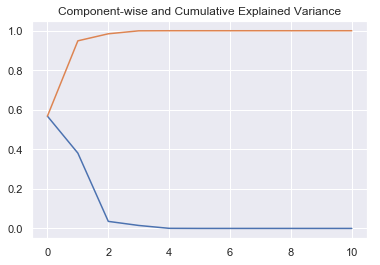

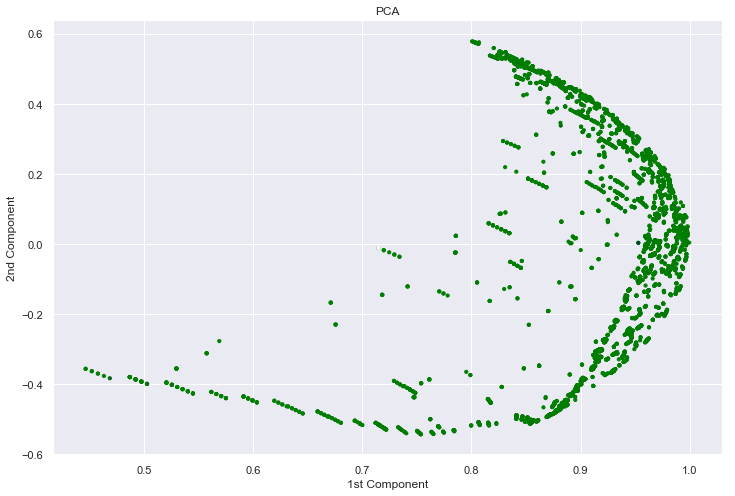

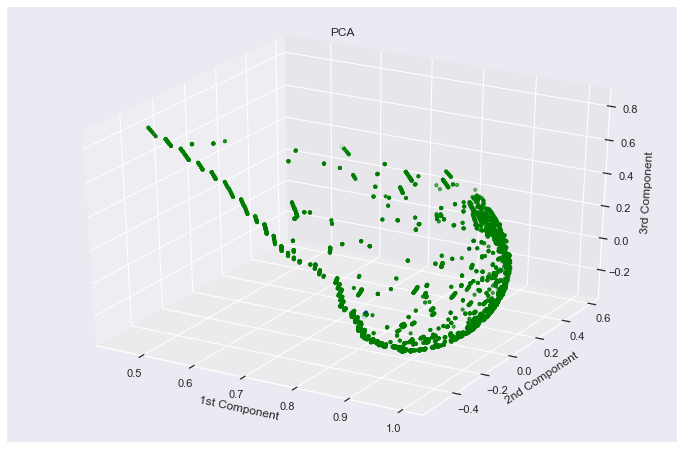

In [293]:
pca(X,y,X.shape[1])